![](images/107_2465-e1394732955432.jpg)

<font color=red> Image Reference: https://ehg.lshtm.ac.uk/cholera/</font>

# <center><b><font color=green>Can improved sanitation and hygiene stop Cholera???</font></b></center>

### <b><font color=grey>Project by Shaik Sabiha</font></b>

## <b>INTRODUCTION</b>

Cholera is an acute diarrhoeal disease caused by the bacterium <i>Vibrio cholerae</i> and spreads through fecal-oral route <sup>1</sup>.  The global burden of cholera is very high with an estimated 100000 deaths every year<sup>2</sup>. Cholera treatment, hospitilization and the related lost productivity has been reported to be upto an estimated loss of 2 billion dollars per year all over the world<sup>3</sup>. This acute infection with painless watery diarrhoea, nausea and vomiting can turn severe in few cases such as malnourished people and requires prompt and adequate treatment. If untreated, this can even lead to death in few cases<sup>4</sup>. 

Low socio-economic status and poor sanitation systems contribute to persistence of cholera in endemic zones of under developed/developing settings although it disappeared from the developed nations<sup>5</sup>. Safe water, effective sanitization and proper hygiene are very crucial in preventing cholera and many countries with improved sanitization and hygiene have reported lesser contamination rates. It has been reported that, low- and middle-income countries affected by cholera have lesser access to basic water and sanitization services than the ones without cholera<sup>6</sup>. The United Nations Children’s Fund (UNICEF) and World Health Organization (WHO) Joint Monitoring Programme have reported that many low-income countries, such as Cambodia and Ethiopia, were significantly able to curb diarraheal diseases by implementing several water sanitation and hygiene interventions<sup>7,8</sup>. 

A global strategy at the country level has also been devised by WHO to bring down the number of cholera deaths by 90% by 2030<sup>9</sup>. The intervention methods such as provision of adequate safe drinking water, proper personal hygiene, proper food hygiene and hygeinic disposal of human excreta are needed to prevent the spread of cholera <sup>4</sup>.

To reaffirm the WHO guidelines for preventing Cholera using best sanitation and hygiene practices, the following questions were analyzed using the WHO data across different countries. 
1. How has Cholera prevailed worldwide from 1949 to 2016?
2. What are the most adversely affected countries over these years?
3. Is there any correlation between the water and sanitation indicators and cholera incidences in this dataset?



## <b> Setting up the environment</b> 

In [1]:
import pandas as pd #data manipulation and analysis
import numpy as np #scientific computing of numerical arrays
import matplotlib.pyplot as plt #visualization
import seaborn as sns #statistical data visualization
from functools import reduce #functional programming

%matplotlib inline 

## <b>Defined functions for the analysis</b>

In [2]:
def clean_table(df, header, new_header):
    
    '''Function to clean the WHO sanitation data and return the long format 
       of the extracted information. 
       
       Input arguments: 
                 dataframe
                 header of the column to be selected
                 new header that should be added to the cleaned dataframe.'''
    
    header=header+'$'
    
    temp_header=df.filter(regex=header,axis=1)
    temp_country=pd.DataFrame(\
                      san["Unnamed: 0_level_0_Unnamed: 0_level_1_Country"])
    
    data_trimmed=pd.concat([temp_country, temp_header], axis=1, sort=False)
    
    data_trimmed.columns=data_trimmed.columns\
                            .str.replace(header, "",regex=True) 
    
    data_trimmed.columns=data_trimmed.columns\
                            .str.replace(\
                                 "Unnamed: 0_level_0_Unnamed: 0_level_1_","",
                                       regex=True) 
    
    col_names=list(data_trimmed.iloc[0:,1:].columns)
    df_final=pd.melt(data_trimmed, 
                     id_vars =['Country'], 
                     value_vars =col_names,
                     var_name ='Year', 
                     value_name = new_header)\
                        .sort_values(by=['Country','Year'])
    
    return(df_final)

In [3]:
def plot_bar(df,x,type_bar):
    
    '''Function to plot bar plots
             
       Input arguments: 
                 dataframe,
                 x column,
                 kind of barplot (bar or barh).''' 
    y='Reported_cases'
    z='Reported_deaths'
    
    bar_plot=df.set_index(x)[[y, z]].plot(kind=type_bar, figsize=(20, 10))
   
    return(bar_plot)

In [4]:
def plot_custom(title,x,name):
    
    '''Function to customize plots
             
       Input arguments: 
                 title of plot,
                 x label,
                 Image name with file extension.''' 
    
    plt.xticks(rotation=60)
    plt.title(title, fontsize=18, y=1.01)
    plt.xlabel(x, labelpad=15)
    plt.ylabel("Counts", labelpad=15)
    plt.legend(["Reported cases", "Reported deaths"], fontsize=16);
    #plt.show()
    plt.savefig(name)
    
   
    

## <b>Data Collection and Preprocessing</b> 

The data is collected from the Global Health Observatory data repository, WHO (https://apps.who.int/gho/data/node.main.174?lang=en). 


### <b><font color=grey>1. Reading the cholera incidence, reported deaths data from WHO into a dataframe</font></b>

In [5]:
#cholera incidence records

incidence_df=pd.read_csv("input_files/CHOLERA_reported_incidence.csv") 

incidence_df.head()

,Country,Year,Number of reported cases of cholera
0,Afghanistan,2016,677
1,Afghanistan,2015,58064
2,Afghanistan,2014,45481
3,Afghanistan,2013,3957
4,Afghanistan,2012,12


In [6]:
incidence_df.shape #Checking the dataframe size

(2470, 3)

The incidence reports have 2470 records on number of reported cases every year from different countries

In [7]:
 #reported deaths records
deaths_df=pd.read_csv("input_files/CHOLERA_reported_deaths.csv")

deaths_df.head()

,Country,Year,Number of reported deaths from cholera
0,Afghanistan,2016,5
1,Afghanistan,2015,8
2,Afghanistan,2014,4
3,Afghanistan,2013,14
4,Afghanistan,2012,0


In [8]:
deaths_df.shape #Checking the dataframe size

(2375, 3)

The reported deaths dataframe has 2375 records from different countries

In [9]:
#Merging the cholera incidence and reported deaths data 
#to include all the records from both the dataframes

cholera_df=pd.merge(incidence_df,deaths_df,how='outer') 

cholera_df.head()   



,Country,Year,Number of reported cases of cholera,Number of reported deaths from cholera
0,Afghanistan,2016,677,5
1,Afghanistan,2015,58064,8
2,Afghanistan,2014,45481,4
3,Afghanistan,2013,3957,14
4,Afghanistan,2012,12,0


In [10]:
cholera_df.shape

(2491, 4)

The new combined dataframe has 2491 records

### <b><font color=grey>2. Pre-processing the cholera dataframe for missing values and other insignificant information</font></b>

In [11]:
#Changing the column headers

names_dic={"Number of reported cases of cholera":"Reported_cases",
           "Number of reported deaths from cholera":"Reported_deaths"}

cholera_df=cholera_df.rename(columns=names_dic)

In [12]:
# Checking the data types of the columns in the dataframe

cholera_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2491 entries, 0 to 2490
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          2491 non-null   object
 1   Year             2491 non-null   int64 
 2   Reported_cases   2470 non-null   object
 3   Reported_deaths  2375 non-null   object
dtypes: int64(1), object(3)
memory usage: 97.3+ KB


<i>Reported_cases</i> and <i>Reported_deaths</i> columns are stored as objects instead of integers. Will be checking for non-numeric characters before converting them into integer types


In [13]:
#Checking for any non-numeric characters in the Reported cases columns 
#and converting them to the correct value or Nan

cholera_df[cholera_df['Reported_cases']
           .str.contains('[^0-9\.]')\
           .astype(bool) & cholera_df['Reported_cases'].notnull()]



,Country,Year,Reported_cases,Reported_deaths
81,Australia,2011,6,0
121,Bahamas,2011,1,NaN
246,Brazil,2011,1,0
260,Brunei Darussalam,2011,3,NaN
412,Canada,2011,9,NaN
459,Chile,2011,1,0
472,China,2011,26,NaN
645,Dominican Republic,2011,20851,336
714,France,2011,1,0
763,Germany,2011,4,0


On further investigation, it was observed that these values have lagging spaces. They were removed to convert them into numeric values

In [14]:
#Removing the leading and lagging spaces from the column Reported_cases

cholera_df.Reported_cases=cholera_df['Reported_cases'].str.strip()

cholera_df[cholera_df['Reported_cases']
           .str.contains('[^0-9\.]')\
           .astype(bool) & cholera_df['Reported_cases'].notnull()]

,Country,Year,Reported_cases,Reported_deaths
1059,Iraq,2016,3 5,0 0


We can still see that one of the values has space in between. 

In [15]:
# Correcting the value 

cholera_df['Reported_cases'].iloc[1059] = '35'

cholera_df[cholera_df['Reported_cases']
           .str.contains('[^0-9\.]')\
           .astype(bool) & cholera_df['Reported_cases'].notnull()]


/home/sabihariaz/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Country,Year,Reported_cases,Reported_deaths


Similar steps are performed for the reported deaths column

In [16]:
#Checking for any non-numeric characters in the Reported deaths columns and converting them to the correct value or Nan

cholera_df[cholera_df['Reported_deaths']
           .str.contains('[^0-9\.]')\
           .astype(bool) & cholera_df['Reported_deaths'].notnull()]

,Country,Year,Reported_cases,Reported_deaths
761,Germany,2016,1,Unknown
1059,Iraq,2016,35,0 0


In [17]:
#Converting the unknown to Nan and the other value to 0

cholera_df.loc[761, 'Reported_deaths'] = np.nan

cholera_df.loc[1059, 'Reported_deaths'] = '0'

In [18]:
cholera_df[cholera_df['Reported_deaths']
           .str.contains('[^0-9\.]')
           .astype(bool) & cholera_df['Reported_deaths'].notnull()]

,Country,Year,Reported_cases,Reported_deaths


In [19]:
#Converting the columns into numeric 

cholera_df.Reported_cases = pd.to_numeric(cholera_df.Reported_cases)

cholera_df.Reported_deaths = pd.to_numeric(cholera_df.Reported_deaths)


Dealing with the missing values

In [20]:
#Dealing with missing values

for column in ['Reported_cases', 'Reported_deaths']:
    print("Number of missing values in {} column are {}"
          .format(column,cholera_df[column].isnull().sum()))


Number of missing values in Reported_cases column are 21
Number of missing values in Reported_deaths column are 117


In [21]:
#Since Zero also has significant meaning in these columns, 
#we will drop the rows with missing values for further analysis

cholera_drop_df  = cholera_df.dropna() 

print(cholera_drop_df.isnull().sum())

Country            0
Year               0
Reported_cases     0
Reported_deaths    0
dtype: int64


### <b><font color=grey>3. Reading the Water and hygiene related indicators data from WHO</font></b>

In [22]:
#Sanitation data

san=pd.read_csv("input_files/sanitation.csv",header=[0,1,2])

san.columns = san.columns.map('_'.join)

san.head()

,Unnamed: 0_level_0_Unnamed: 0_level_1_Country,2017_ Population using at least basic sanitation services (%)_ Total,2017_ Population using at least basic sanitation services (%)_ Urban,2017_ Population using at least basic sanitation services (%)_ Rural,2017_ Population using safely managed sanitation services (%)_ Total,2017_ Population using safely managed sanitation services (%)_ Urban,2017_ Population using safely managed sanitation services (%)_ Rural,2016_ Population using at least basic sanitation services (%)_ Total,2016_ Population using at least basic sanitation services (%)_ Urban,2016_ Population using at least basic sanitation services (%)_ Rural,...,2001_ Population using at least basic sanitation services (%)_ Rural,2001_ Population using safely managed sanitation services (%)_ Total,2001_ Population using safely managed sanitation services (%)_ Urban,2001_ Population using safely managed sanitation services (%)_ Rural,2000_ Population using at least basic sanitation services (%)_ Total,2000_ Population using at least basic sanitation services (%)_ Urban,2000_ Population using at least basic sanitation services (%)_ Rural,2000_ Population using safely managed sanitation services (%)_ Total,2000_ Population using safely managed sanitation services (%)_ Urban,2000_ Population using safely managed sanitation services (%)_ Rural
0,Afghanistan,43.0,62.0,37.0,NaN,NaN,NaN,42.0,60.0,36.0,...,22.0,NaN,NaN,NaN,24.0,30.0,22.0,NaN,NaN,NaN
1,Albania,98.0,98.0,97.0,40.0,40.0,39.0,98.0,98.0,97.0,...,83.0,38.0,40.0,37.0,88.0,97.0,82.0,39.0,40.0,38.0
2,Algeria,88.0,90.0,82.0,18.0,16.0,21.0,88.0,90.0,82.0,...,73.0,19.0,18.0,19.0,84.0,91.0,72.0,19.0,18.0,19.0
3,Andorra,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,22.0,22.0,22.0,100.0,100.0,100.0,15.0,15.0,15.0
4,Angola,50.0,64.0,23.0,NaN,NaN,NaN,49.0,63.0,22.0,...,8.0,NaN,NaN,NaN,28.0,48.0,8.0,NaN,NaN,NaN


Since we need only information from the "Total" columns in a long format, we are passing the dataframe to a common function defined earlier in the script. 

In [23]:
#dataframe with information on basic sanitation from total population

basic_sanitation=clean_table(san,
         "_ Population using at least basic sanitation services \(%\)_ Total",
         "Basic_Sanitation")
    
basic_sanitation.head()

,Country,Year,Basic_Sanitation
3298,Afghanistan,2000,24.0
3104,Afghanistan,2001,24.0
2910,Afghanistan,2002,25.0
2716,Afghanistan,2003,26.0
2522,Afghanistan,2004,27.0


In [24]:
#creating a dataframe with information on managed sanitation  
#from total population using clean_table function

managed_sanitation=clean_table(san,
           "_ Population using safely managed sanitation services \(%\)_ Total",
           "Managed_Sanitation")

managed_sanitation.head()

,Country,Year,Managed_Sanitation
3298,Afghanistan,2000,NaN
3104,Afghanistan,2001,NaN
2910,Afghanistan,2002,NaN
2716,Afghanistan,2003,NaN
2522,Afghanistan,2004,NaN


In [25]:
#open defecation data

od=pd.read_csv("input_files/open_defecaion.csv",header=[0,1,2]) 

od.columns = od.columns.map('_'.join)

#creating a dataframe with information on managed sanitation 
#from total population using clean_table function

open_defecation=clean_table(od,
                    "_ Population practising open defecation \(%\)_ Total",
                    "Open_defecation")

open_defecation.head()

,Country,Year,Open_defecation
3298,Afghanistan,2000,26.0
3104,Afghanistan,2001,26.0
2910,Afghanistan,2002,25.0
2716,Afghanistan,2003,24.0
2522,Afghanistan,2004,23.0


In [26]:
#hand washing data from different countries

hw=pd.read_csv("input_files/hand_washing.csv",header=[0,1,2]) 
hw.columns=hw.columns.map('_'.join)

#creating a dataframe with information on basic hand washing 
#from total population using clean_table function

hand_washing=clean_table(hw,
         "_ Population with basic handwashing facilities at home \(%\)_ Total",
         "Basic_handwashing")

hand_washing.head()

,Country,Year,Basic_handwashing
3298,Afghanistan,2000,NaN
3104,Afghanistan,2001,NaN
2910,Afghanistan,2002,NaN
2716,Afghanistan,2003,NaN
2522,Afghanistan,2004,NaN


In [27]:
#drinking water data from different countries

dw=pd.read_csv("input_files/drinking_water.csv",header=[0,1,2]) 
dw.columns=dw.columns.map('_'.join)
dw.head()


,Unnamed: 0_level_0_Unnamed: 0_level_1_Country,2017_ Population using at least basic drinking-water services (%)_ Total,2017_ Population using at least basic drinking-water services (%)_ Urban,2017_ Population using at least basic drinking-water services (%)_ Rural,2017_ Population using safely managed drinking-water services (%)_ Total,2017_ Population using safely managed drinking-water services (%)_ Urban,2017_ Population using safely managed drinking-water services (%)_ Rural,2016_ Population using at least basic drinking-water services (%)_ Total,2016_ Population using at least basic drinking-water services (%)_ Urban,2016_ Population using at least basic drinking-water services (%)_ Rural,...,2001_ Population using at least basic drinking-water services (%)_ Rural,2001_ Population using safely managed drinking-water services (%)_ Total,2001_ Population using safely managed drinking-water services (%)_ Urban,2001_ Population using safely managed drinking-water services (%)_ Rural,2000_ Population using at least basic drinking-water services (%)_ Total,2000_ Population using at least basic drinking-water services (%)_ Urban,2000_ Population using at least basic drinking-water services (%)_ Rural,2000_ Population using safely managed drinking-water services (%)_ Total,2000_ Population using safely managed drinking-water services (%)_ Urban,2000_ Population using safely managed drinking-water services (%)_ Rural
0,Afghanistan,67.0,96.0,57.0,NaN,NaN,NaN,64.0,93.0,55.0,...,22.0,NaN,NaN,NaN,28.0,49.0,22.0,NaN,NaN,NaN
1,Albania,91.0,92.0,90.0,70.0,NaN,NaN,91.0,92.0,90.0,...,82.0,49.0,NaN,NaN,88.0,96.0,82.0,49.0,NaN,NaN
2,Algeria,94.0,95.0,89.0,NaN,NaN,NaN,94.0,95.0,89.0,...,84.0,NaN,NaN,NaN,90.0,94.0,83.0,NaN,NaN,NaN
3,Andorra,100.0,100.0,100.0,91.0,NaN,NaN,100.0,100.0,100.0,...,100.0,91.0,NaN,NaN,100.0,100.0,100.0,91.0,NaN,NaN
4,Angola,56.0,71.0,27.0,NaN,NaN,NaN,55.0,71.0,27.0,...,22.0,NaN,NaN,NaN,41.0,61.0,21.0,NaN,NaN,NaN


In [28]:
#creating a dataframe with information on basic drinking water 
#from total population using clean_table function

basic_drinking_water=clean_table(dw,
      "_ Population using at least basic drinking-water services \(%\)_ Total",
      "Percentage_basic_drinking_water_services")

basic_drinking_water.head()

,Country,Year,Percentage_basic_drinking_water_services
3298,Afghanistan,2000,28.0
3104,Afghanistan,2001,28.0
2910,Afghanistan,2002,30.0
2716,Afghanistan,2003,32.0
2522,Afghanistan,2004,34.0


In [29]:
#creating a dataframe with information on basic drinking water 
#from total population using clean_table function

managed_drinking_water=clean_table(dw,
       "_ Population using safely managed drinking-water services \(%\)_ Total"
       ,"Percentage_managed_drinking_water_services")

managed_drinking_water.head()

,Country,Year,Percentage_managed_drinking_water_services
3298,Afghanistan,2000,NaN
3104,Afghanistan,2001,NaN
2910,Afghanistan,2002,NaN
2716,Afghanistan,2003,NaN
2522,Afghanistan,2004,NaN


### <font color=grey><b>4. Merging the cleaned water and sanitation related data into a single dataframe</b></font>

In [30]:
#list of dataframes for merging

df_list=[basic_sanitation,managed_sanitation,
         open_defecation,hand_washing,
         basic_drinking_water,managed_drinking_water]

sanitation_df=reduce(lambda x, y: pd.merge(x, y, how = 'outer'), df_list)
sanitation_df.head()

,Country,Year,Basic_Sanitation,Managed_Sanitation,Open_defecation,Basic_handwashing,Percentage_basic_drinking_water_services,Percentage_managed_drinking_water_services
0,Afghanistan,2000,24.0,NaN,26.0,NaN,28.0,NaN
1,Afghanistan,2001,24.0,NaN,26.0,NaN,28.0,NaN
2,Afghanistan,2002,25.0,NaN,25.0,NaN,30.0,NaN
3,Afghanistan,2003,26.0,NaN,24.0,NaN,32.0,NaN
4,Afghanistan,2004,27.0,NaN,23.0,NaN,34.0,NaN


### <font color=grey><b>5. Merging the sanitation and cholera dataframes</b></font>

In [31]:
#Checking the years during which the sanitation data is available from WHO

sanitation_df.Year.sort_values().unique()

array(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017'], dtype=object)

In [32]:
#Since the sanitation dataframe has only information from 2000, 
#we will remove older entries from the cholera dataset as well and then merge

cholera_reduced_df=cholera_drop_df[cholera_drop_df.Year>=2000]

cholera_reduced_df.Year.sort_values().unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016])

In [33]:
#Checking if the columns for merging are of same datatype 

sanitation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3492 entries, 0 to 3491
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     3492 non-null   object 
 1   Year                                        3492 non-null   object 
 2   Basic_Sanitation                            3439 non-null   float64
 3   Managed_Sanitation                          1571 non-null   float64
 4   Open_defecation                             3402 non-null   float64
 5   Basic_handwashing                           921 non-null    float64
 6   Percentage_basic_drinking_water_services    3449 non-null   float64
 7   Percentage_managed_drinking_water_services  1745 non-null   float64
dtypes: float64(6), object(2)
memory usage: 245.5+ KB


In [34]:
cholera_drop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2353 entries, 0 to 2468
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          2353 non-null   object 
 1   Year             2353 non-null   int64  
 2   Reported_cases   2353 non-null   float64
 3   Reported_deaths  2353 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 91.9+ KB


In [35]:
#Converting the Year coulmn from the sanitation data to an integer

sanitation_df.Year=sanitation_df.Year.astype(int)

In [36]:
final_df=pd.merge(cholera_reduced_df,sanitation_df,how='left')

In [37]:
final_df.head()

,Country,Year,Reported_cases,Reported_deaths,Basic_Sanitation,Managed_Sanitation,Open_defecation,Basic_handwashing,Percentage_basic_drinking_water_services,Percentage_managed_drinking_water_services
0,Afghanistan,2016,677.0,5.0,42.0,NaN,13.0,38.0,64.0,NaN
1,Afghanistan,2015,58064.0,8.0,41.0,NaN,14.0,38.0,62.0,NaN
2,Afghanistan,2014,45481.0,4.0,39.0,NaN,15.0,38.0,59.0,NaN
3,Afghanistan,2013,3957.0,14.0,38.0,NaN,16.0,37.0,56.0,NaN
4,Afghanistan,2012,12.0,0.0,37.0,NaN,17.0,37.0,54.0,NaN


### <font color=grey><b>6. Dealing with the missing values</b></font>

In [38]:
#Finding out the number of missing values from the dataframe

final_df.isnull().sum()

Country                                         0
Year                                            0
Reported_cases                                  0
Reported_deaths                                 0
Basic_Sanitation                                2
Managed_Sanitation                            523
Open_defecation                                 6
Basic_handwashing                             632
Percentage_basic_drinking_water_services        4
Percentage_managed_drinking_water_services    520
dtype: int64

In [39]:
#Filling the missing values with the mean of each respective columns

final_df.fillna(final_df.mean(), inplace=True)

In [40]:
#Information of the final dataframe
#Number of countries from which the data is collected

len(final_df.Country.sort_values().unique())

121

In [41]:
#Time frame during which the data is collected

print(final_df.Year.sort_values().unique())
print(len(final_df.Year.sort_values().unique()))


[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016]
17


In [42]:
len(cholera_drop_df.Country.sort_values().unique())

160

In [43]:
#Time frame during which the data is collected

print(cholera_drop_df.Year.sort_values().unique())
print(len(cholera_drop_df.Year.sort_values().unique()))


[1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962
 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976
 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990
 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016]
68


## <b> Data collected </b>

The curated cholera dataset has yearly country-wise information from 160 different countries spanning during the years 1949-2016. 
The final dataset with cholera incidence as well as respective water and sanitation indicators have information from 121 countries from 2000-2016

## <b> An insight into the data collected </b>

### <font color=brown> <b>Q1. What is the worldwide prevalence of Cholera from 1949 to 2016?</b></font>

In [44]:
#Extracting the incidence and reported death numbers from the cholera dataframe 
ww_cases= cholera_drop_df.groupby('Year').sum().loc[:, 
                                            ['Reported_cases', 
                                            'Reported_deaths']].reset_index()
ww_cases

,Year,Reported_cases,Reported_deaths
0,1949,17.0,3.0
1,1950,34665.0,16133.0
2,1951,114518.0,58661.0
3,1952,123025.0,71397.0
4,1953,240927.0,141173.0
...,...,...,...
63,2012,245393.0,3034.0
64,2013,129067.0,2102.0
65,2014,187329.0,2231.0
66,2015,172445.0,1304.0


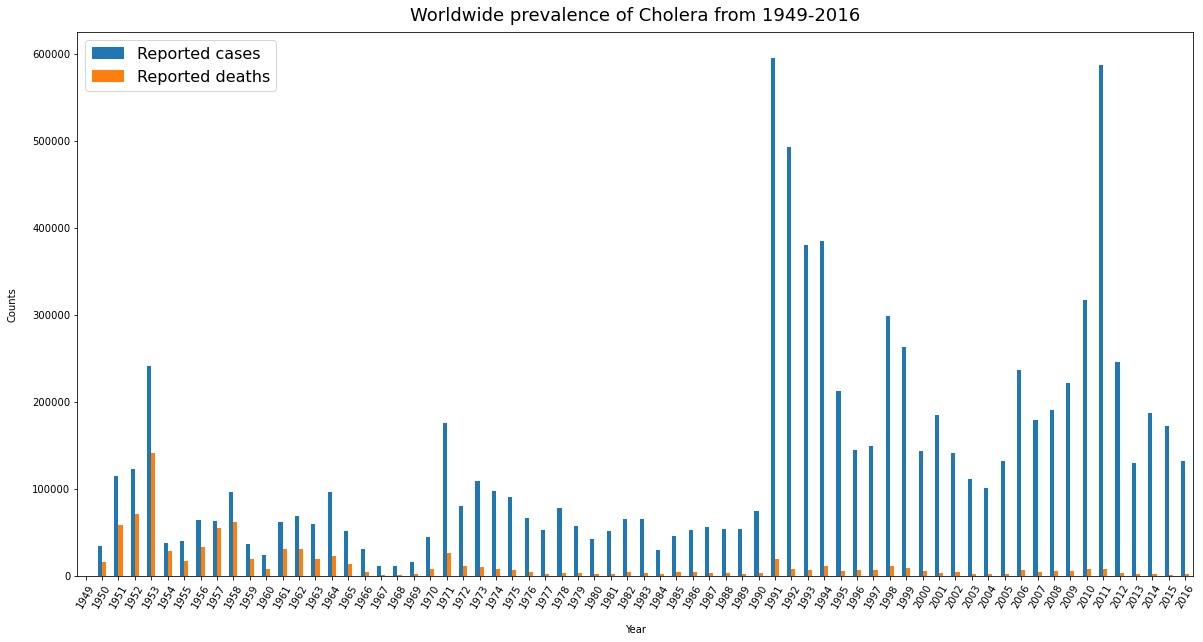

In [45]:
#Plotting the prevalence using defined functions plot_bar, plot_custom

plot_bar(ww_cases,'Year','bar')
plot_custom("Worldwide prevalence of Cholera from 1949-2016",
                'Year','images/Prevalence.png')


<b><i>Inferences from the above graph:</i></b>

1. The prevalence in the number of cases worldwide has been increasing from the 1990's, though the number of deaths reported are relatively low. 
2. Highest number of cases were reported during 1991 and 2011 
3. The number of deaths recorded due to Cholera were high till 1960s and there after very less even when the incidence cases were high which could be due to the improvement in the health systems, awareness of the disease as well as vaccines.


### <font color=brown> <b>Q2. What are the most adversely affected countries over these years?</b></font>

In [46]:

c_cases=cholera_drop_df.groupby('Country').sum()\
                            .loc[:, ['Reported_cases','Reported_deaths']]\
                            .sort_values(by='Reported_cases',ascending=False)\
                            .reset_index()

#top=c_cases.head(20).style.background_gradient(cmap="Reds")
top=c_cases.head(20).sort_values(by='Reported_cases', ascending=True)

top

,Country,Reported_cases,Reported_deaths
19,Uganda,108877.0,4408.0
18,Kenya,118214.0,3873.0
17,Ethiopia,118297.0,1521.0
16,Malawi,142935.0,3464.0
15,Zimbabwe,153425.0,7137.0
14,Ghana,167934.0,5849.0
13,Brazil,173220.0,1774.0
12,South Africa,186463.0,904.0
11,Angola,191035.0,9920.0
10,United Republic of Tanzania,228048.0,12725.0


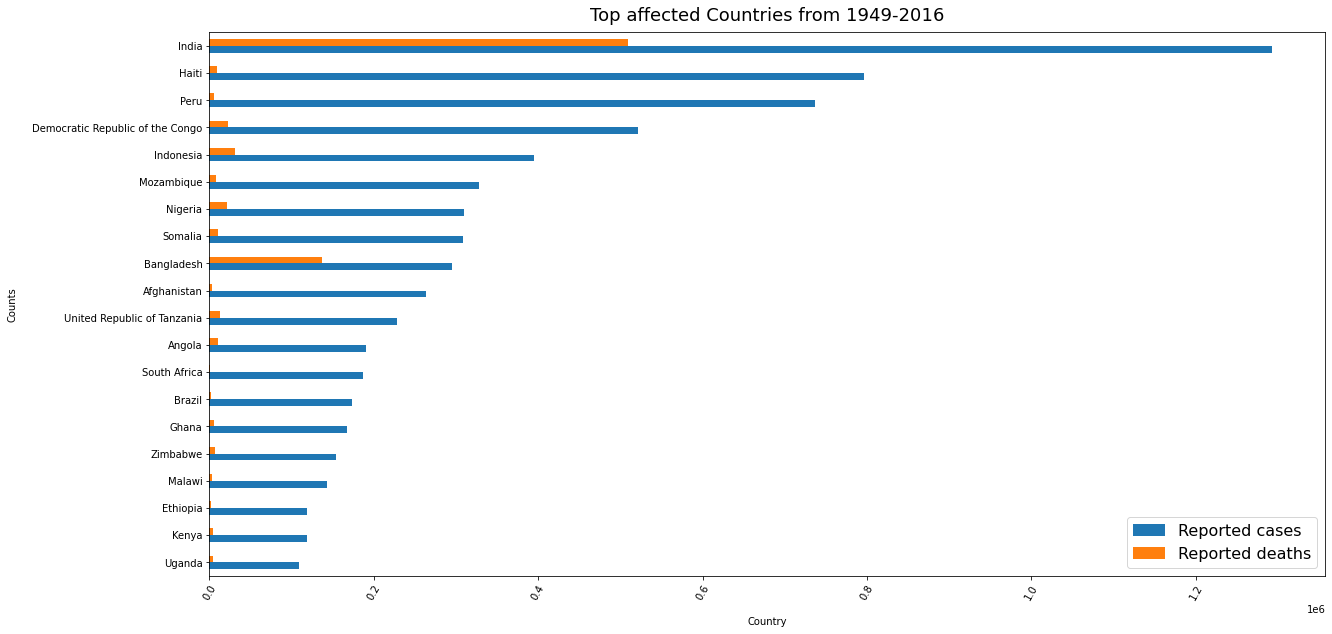

In [47]:
#Plotting the top affected countries 
#using defined functions plot_bar, plot_custom

plot_bar(top,'Country','barh')
plot_custom("Top affected Countries from 1949-2016",
                'Country','images/countries.png')

<b><i>Inferences from the above analysis:</i></b>

1. India, Haiti and Peru are the top three countries with the highest number of incidences during all these years
2. While India was leading in the number of deaths reported as well, Bangladesh reported relatively higher death cases due to Cholera than other countries with relatively higher incidence numbers.

    

### <font color=brown> <b>Q3. Is there any correlation between the water and sanitation indicators and cholera incidences in this dataset?</b>

In [48]:
#converting the year column into a string 
final_df.Year=final_df.Year.astype(str)

final_df_correlations = final_df.corr(method='pearson')

In [49]:
final_df_correlations=final_df_correlations.iloc[2:,:2]
final_df_correlations

,Reported_cases,Reported_deaths
Basic_Sanitation,-0.148572,-0.180672
Managed_Sanitation,-0.047952,-0.071541
Open_defecation,0.073113,0.081696
Basic_handwashing,0.189386,0.122750
Percentage_basic_drinking_water_services,-0.165497,-0.224604
Percentage_managed_drinking_water_services,-0.070685,-0.090739


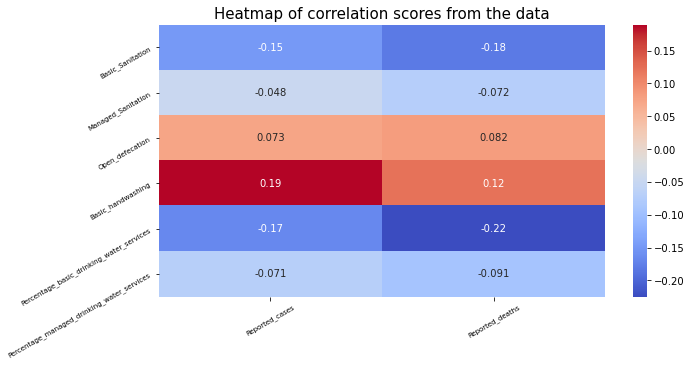

In [50]:
plt.figure(figsize=(10,5))
sns.heatmap(data=final_df_correlations, annot=True,  cmap= 'coolwarm')\
              .set_title('Heatmap of correlation scores from the data',size=15)
plt.xticks(fontsize=7,rotation=30)
plt.yticks(fontsize=7,rotation=30)
plt.savefig('images/correlation.png',dpi=300)

<b><i>Inferences from the above analysis:</i></b>

It can observed that, there is a negative correlation between the sanitation, and drinking water services and cholera incidence as well as death, which indicates that the countries with lower sanitation and poor drinking facilities have a higher death rate. Thus, as suggested by WHO, improving sanitation and hygiene can help in reducing the number of cases of Cholera.

A slight positive association is also seen between open defecation and death as well as incidence numbers. 

Its confusing to see a positive correlation between hand washing and incidence numbers.

## <b>Conclusion</b>

With these analysis, I have tried to look into the prevalence patterns of Cholera all over the world during 1949–2016 based on the data from WHO and conclude the following:
1. India is the top most country with majority of the incidences as well as death cases.

2. Bangladesh reported the highest number of deaths after India, though there were other countries with higher incidences
3. The correlation analysis shows that, it is mandatory to follow best hygienic practices such as safe drinking water, better sanitation and avoiding open defecation to prevent Cholera mainly in case of developing countries


Since, the data was limited, the conclusions are also limited to the data set collected.

## <b>References</b>

1.Harris, J. B., LaRocque, R. C., Qadri, F., Ryan, E. T. & Calderwood, S. B. Cholera. in The Lancet 379, 2466–2476 (2012).

2.Ali, M., Nelson, A. R., Lopez, A. L. & Sack, D. A. Updated global burden of cholera in endemic countries. PLoS Negl. Trop. Dis. 9, (2015).

3.https://reliefweb.int/report/world/war-end-cholera-how-lack-clean-water-and-sanitation-are-contributing-global-spread

4.https://www.who.int/water_sanitation_health/diseases-risks/diseases/cholera/en/

5.Clemens, J. D., Nair, G. B., Ahmed, T., Qadri, F. & Holmgren, J. Cholera. The Lancet 390, 1539–1549 (2017).

6.Pezzoli L. Deployments from the oral cholera vaccine stockpile, 2013–2017. Wkly Epidemiol Rec. 2017. August 11;92(32):437–42.

7.Progress on drinking water, sanitation and hygiene. 2017 update and SDG baselines. Geneva: United Nations Children’s Fund and World Health Organization; 2017.

8.Wolf J, Hunter PR, Freeman MC, Cumming O, Clasen T, Bartram J, et al. Impact of drinking water, sanitation and handwashing with soap on childhood diarrhoeal disease: updated meta-analysis and meta-regression. Trop Med Int Health. 2018. May;23(5):508–25.

9.Ending Cholera: A global road map to 2030 (http://www.who.int/cholera/publications/global-roadmap/en/).